#### Lecture 10.01

#### October 1, 2024

Perceptron Lecture Part II

/var/folders/wh/0vhbgndn6rjcj1dgs8327xf40000gn/T/ipykernel_38016/420748477.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_slope[k] = -wx/wy;
/var/folders/wh/0vhbgndn6rjcj1dgs8327xf40000gn/T/ipykernel_38016/420748477.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  estimated_intercept[k] = -wb/wy;


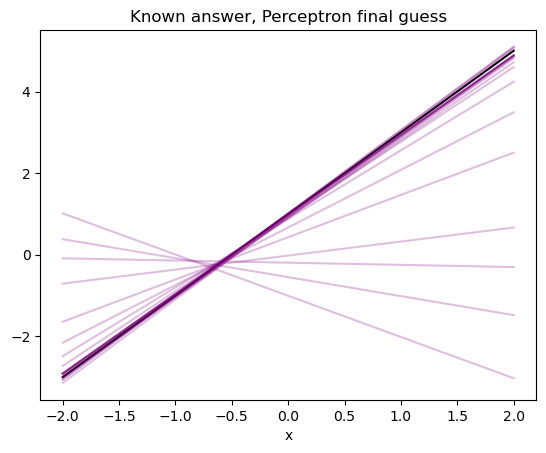

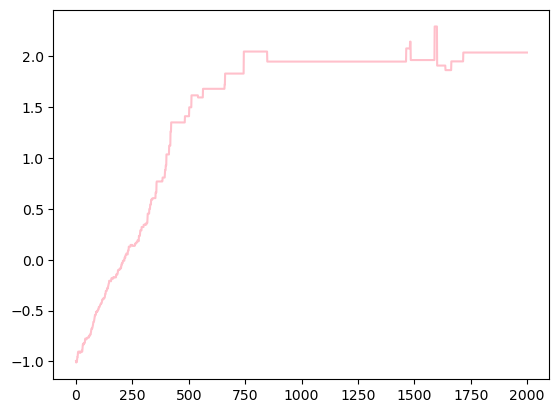

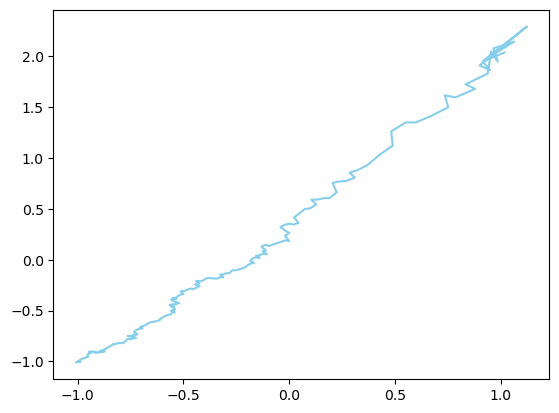

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial values
slope = 2
intercept = 1
wx = 1
wy = 1
wb = 1
bias = 1
learning_constant = .01
estimated_slope = np.zeros(2000)
estimated_intercept = np.zeros(2000)

"""
Function that computes the known solution
"""
def known_answer(slope, intercept, x, y):
    
    # Define yline
    yline = slope*x + intercept

    # Is the input y above or below the line?
    if y > yline:
        return 1  # return 1 if above line
    else:
        return 0

"""
Function that computes the perceptron's solution
"""
def feedforward(x,y,wx,wy,wb):
    if (x*wx + y*wy + wb)>0:
        return 1
    else:
        return 0

# Train perceptron to find equation for the line
for k in np.arange(2000):  # [0,1999]
    x = np.random.randn(1)
    y = np.random.randn(1)

    # Compute known answer
    known_sln = known_answer(slope, intercept, x, y)

    # Compute perceptron's answer
    perceptron_sln = feedforward(x, y, wx, wy, wb)

    # Compute the error
    error = known_sln - perceptron_sln

    # Update the weights based on the learning constant
    if error != 0:
        wx = wx + error * x * learning_constant
        wy = wy + error * y * learning_constant
        wb = wb + error * bias * learning_constant

    # Compute estimated slope from perceptron.
    estimated_slope[k] = -wx/wy;

    # Compute estimated intercept from perceptron.
    estimated_intercept[k] = -wb/wy;

# Display results
x_range = np.linspace(-2,2,100);                  # For a range of x-values,
fig, ax = plt.subplots()
ax.plot(x_range, slope*x_range+intercept, 'k')    # ... plot the true line,

for k in range(1,2000,100):                       # ... and plot some intermediate perceptron guess
     ax.plot(x_range, estimated_slope[k]*x_range+estimated_intercept[k], 'purple', alpha=0.25)
                                                  # ... and plot the last perceptron guess
plt.xlabel('x')
plt.title('Known answer, Perceptron final guess')
plt.show()

plt.figure()
plt.plot(estimated_slope, 'pink')
plt.show()

plt.figure()
plt.plot(estimated_intercept, estimated_slope, 'skyblue')
plt.show()


___

